# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## <font color='brown'>오픈데이터 활용</font>

### 재미있는 사이트, Kaggle.com
> URL : https://www.kaggle.com/

#### 타이타닉 데이터 
> 알고있는 가설을 전제로 확인해보자
- 가정1 : "실제 어린 아이들이 많이 생존했나? "
- 가정2 : "객실등급 1등급 인 사람들이 많이 살았다."
- 가정3 : "남자, 여자"

#### Datasets 다운 : data/taitanic_train.csv
> 
- 과제1 : 남자/여자 수, 객실 등급별 수
- 과제2 : 연령대별 수 ( 10대 : OO명, 20대 : OO명, 30대 : OO명 )
- 과제3 : 남여별/객실등급별 생존자수를 그래프로 표현

####  Data Description
<hr>
``` 
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

### <font color='brown'>데이터 다운로드 및 분석</font>

In [2]:
df = pd.read_csv("data/titanic_train.csv")

In [3]:
df.head(10)         # Pclass: 객실등급, 성별, 나이, 생존 여부

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [5]:
df.groupby(["Sex", "Pclass"]).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [6]:
# df.Age.dropna()
# Return Series without null values

In [7]:
# df.Age.dropna().apply(lambda x:str(x)[:1])

In [8]:
import math

In [9]:
age_series = df.Age.dropna().apply(lambda age: math.floor(age / 10) * 10)
age_series.name = "Age_Group"

In [10]:
age_series

0      20
1      30
2      20
3      30
4      30
6      50
7       0
8      20
9      10
10      0
11     50
12     20
13     30
14     10
15     50
16      0
18     30
20     30
21     30
22     10
23     20
24      0
25     30
27     10
30     40
33     60
34     20
35     40
37     20
38     10
       ..
856    40
857    50
858    20
860    40
861    20
862    40
864    20
865    40
866    20
867    30
869     0
870    20
871    40
872    30
873    40
874    20
875    10
876    20
877    10
879    50
880    20
881    30
882    20
883    20
884    20
885    30
886    20
887    10
889    20
890    30
Name: Age_Group, Length: 714, dtype: int64

In [11]:
df = pd.concat(
    [df, age_series],
    axis=1,
)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10.0


In [12]:
df.Age_Group = df.Age_Group.fillna("Uncategoized")

In [13]:
df.Age_Group.head(10)

0              20
1              30
2              20
3              30
4              30
5    Uncategoized
6              50
7               0
8              20
9              10
Name: Age_Group, dtype: object

In [14]:
df.groupby("Age_Group").size()

Age_Group
0.0              62
10.0            102
20.0            220
30.0            167
40.0             89
50.0             48
60.0             19
70.0              6
80.0              1
Uncategoized    177
dtype: int64

In [15]:
# df.agg : Aggregate using callable, string, dict, or list of string/callables

In [16]:
df.groupby("Pclass").agg({"Survived": "mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
df.groupby("Sex").agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
df.groupby("Sex").agg({"Survived": "sum"})

,Survived
Sex,
female,233
male,109


In [19]:
233/314, 109/577

(0.7420382165605095, 0.18890814558058924)

<hr>
```python
# pd.crosstab : Compute a simple cross-tabulation of two (or more) factors.

Signature: pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, dropna=True, normalize=False)
Docstring:
Compute a simple cross-tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed

```

In [20]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins=True,
)  

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


<hr>
``` python
# df.pivot_table : Create a spreadsheet-style pivot table as a DataFrame

Signature: df.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
Docstring:
Create a spreadsheet-style pivot table as a DataFrame. The levels in the
pivot table will be stored in MultiIndex objects (hierarchical indexes) on
the index and columns of the result DataFrame
```

In [21]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",     # aggfunc="mean" ( 생존률 ); ( 매출: SUM )
)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### <font color='blue'>참조. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html'>pandas.DataFrame.unstack()</a></font>

In [22]:
df.groupby(["Pclass", "Sex"]).size().unstack(1)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [23]:
temp_df = df.groupby(["Pclass", "Sex"]).size().unstack(0)
temp_df

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [24]:
# temp_df.sum(axis=1)
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
# 비율을 연산하는 과정                .sum() => .div()
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [25]:
# temp_df.div
# Floating division of dataframe and other, element-wise


### <font color='brown'>데이터 시각화</font>

### # matplotlib.pyplot style

In [26]:
plt.rcParams['figure.figsize'] = (12,6)

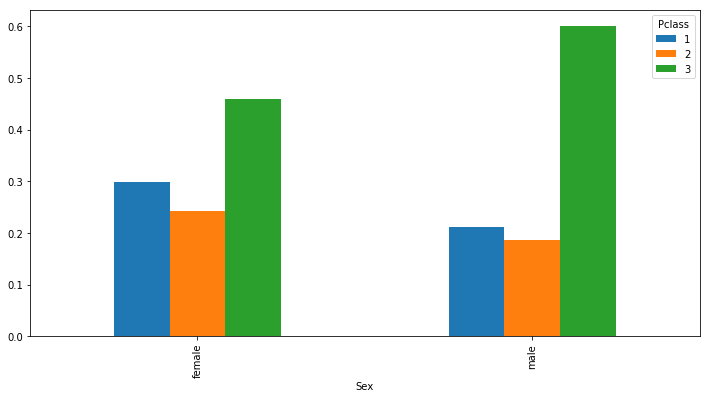

In [27]:
bar_plot = result_df.plot.bar();

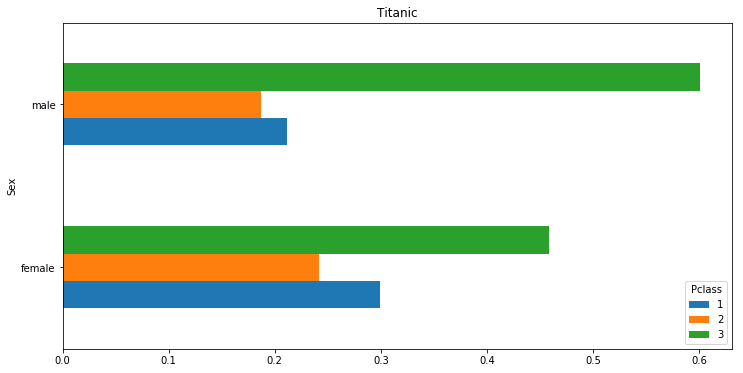

In [28]:
result_df.plot(kind="barh", title="Titanic");

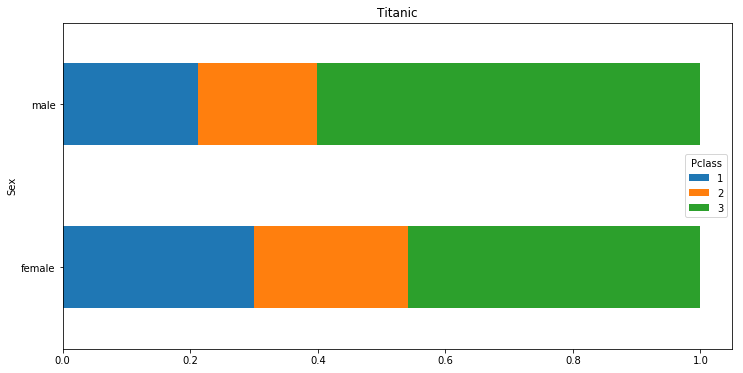

In [29]:
result_df.plot(kind="barh", title="Titanic", stacked=True);

### # seaborn style

In [30]:
import seaborn as sns
sns.set()

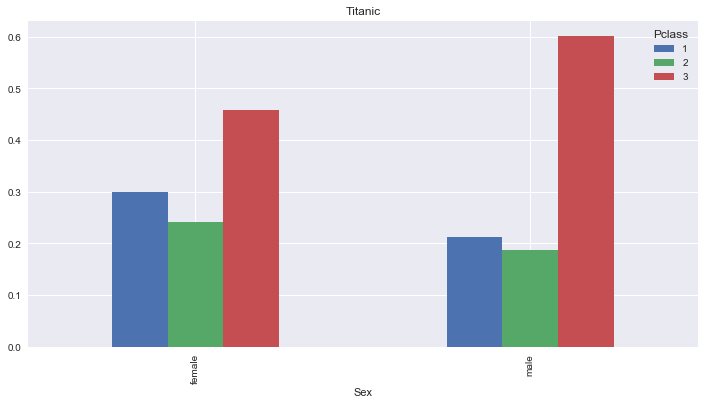

In [31]:
result_df.plot.bar(title="Titanic");

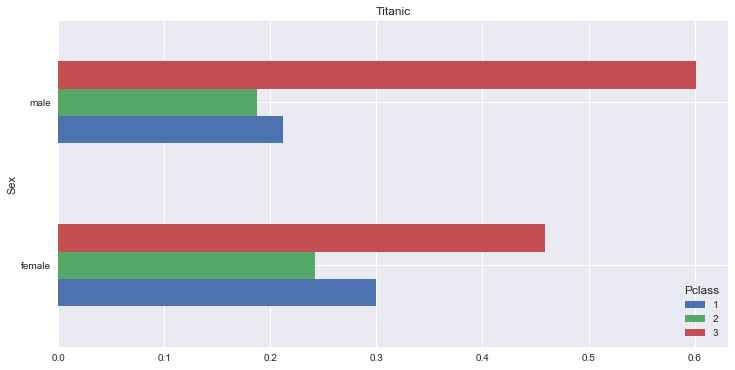

In [32]:
result_df.plot(kind="barh", title="Titanic");

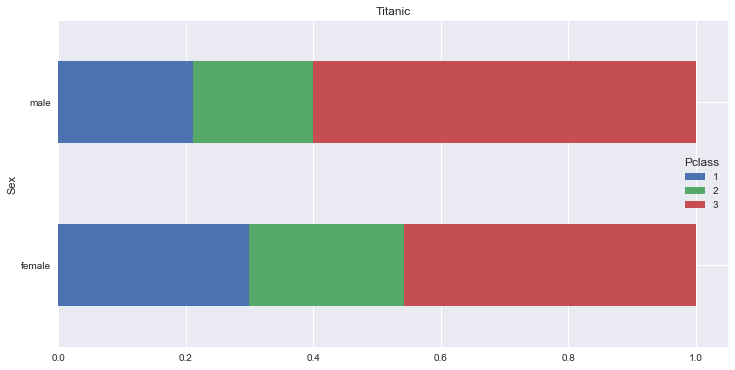

In [33]:
result_df.plot(kind="barh", title="Titanic", stacked=True);

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>